# LPJ-GUESS model evaluation using FLUXNET data for high latitude sites

***
## Table of contents
* [Abstract](#abstract)
* [Preparation](#preparation)
	* [How to run this Jupyter Notebook](#how_to_run)
	* [Python modules](#python_modules)
    * [R packages](#r_packages)
    * [List of abbreviations](#list_of_abbreviations)
* [Methodology](#methodology)
    * [Data](#data)
    * [Study sites](#study_sites)
    * [Five-day mean](#five-day_mean)
* [Time series](#time_series)
* [Scatter plots with identity line](#scatter_plots)
* [Snow depth](#snow_depth)

***
## Abstract <a class="anchor" id="abstract"></a>

The Arctic is warming rapidly which has a considerable impact on the carbon balance and vegetation distribution. In order to gain a better understanding of how these high latitude ecosystems will be affected by climate change in the future, dynamic global vegetation models can be used to simulate vegetation dynamics. One such model is LPJ-GUESS which, since version 4.1, has incorporated some key Arctic-related features, e.g. an updated snowpack scheme, permafrost dynamics and Arctic plant functional types. However, still relatively few studies have applied the model on the Arctic. This study will, therefore, evaluate the performance of LPJ-GUESS when used for high latitude sites. The modelled output will be compared to observations taken from the FLUXNET2015 dataset. 

The study is not yet completed, but some preliminary results sites are presented in this Jupyter Notebook. Four sites have been selected with a latitude of 65°N or more and are situated in four different countries: Russia, the US, Finland and Greenland. The main focus of the model evaluation study is on vegetation carbon fluxes (NEE, GPP and Reco).

The time series and scatter plots show that there is quite some missing data for the NEE at some sites. This is problematic as these types of models generally are not able to accurately capture the fluctuations in NEE. With regard to GPP and Reco, the model seems to be performing relatively well for the site in Finland, whereas the fluxes are clearly underestimated by LPJ-GUESS for the Greenlandic site. The later can be explained by the fact that this site is covered by snow for almost the entire year which greatly influences the establishment and survival rates of vegetation in the model.


***
## Preparation <a class="anchor" id="preparation"></a>

### How to run this Jupyter Notebook <a class="anchor" id="how_to_run"></a>

1. Download the Jupyter Notebook file (*FLUXNET_LPJGUESS.ipynb*), the .yml file (*environment.yml*) and the required data (*Jupyter_FLUXNET_LPJGUESS.RData* and *msnowdepth.out*).

2. Make sure you have installed either [minconda3](https://docs.conda.io/en/latest/miniconda.html) or [anaconda3](https://www.anaconda.com/products/distribution). 

3. Open the anaconda prompt and navigate to the folder where you have saved the .yml file.

4. Install the new environment by running: <code> conda env create -f environment.yml </code>

5. Next activate the new environment by running: <code> conda activate FLUXNET_LPJGUESS </code>

6. Open Jupyter notebook by running: <code> jupyter notebook </code>

Some Python modules need to be imported and various R packages have to be installed. For further instructions, see below.

***
### Python modules <a class="anchor" id="python_modules"></a>

The code in this Jupyter Notebook is mainly based on R, but includes some Python code as well. In order to execute R code, with the ipykernel, R magic has to be enabled. To do so, first one has to set the home directory of R (i.e. the path to where R is installed). This can look something like this:

'C:/Users/.../envs/env_name/lib/R'

Look up the correct path and change this is in the next cell. Run the next two cells to activate R magic for this Notebook.

In [1]:
import os
os.environ['R_HOME'] = 'add_R_path.....'

In [2]:
%%capture

# enable R magic for python
%load_ext rpy2.ipython

Python is also used to enable widgets and to display images. Run the code in the next cell to import the required Python modules.

In [3]:
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display, HTML, IFrame, Image

***
### R packages <a class="anchor" id="r_packages"></a>

A number of R packages is required to run the code in this Jupyter Notebook, see below. By running the code in the next cell the packages are installed, if they are not yet available.

**devtools**

This package is needed to install **DGVMTools**.

**DGVMTools**

This package is key to this project. The data that is used in this Jupyter Notebook has been converted to *Fields* by running the appropriate functions from the package. The function *plotTemporal* is used in this Notebook for plotting time series. It also automatically imports two other important packages: **ggplot2** and **data.table**.

**dplyr**

This package comprises many useful functions for data manipulation. Most important is the %>% operator that can be used to pipe the result form one function to the next step, which makes the code more concise and easier to read.

**htmlTable**

This package contains functions that can be used to create good-looking html tables.

**ggpubr**

This package contains the function *gridarrange* which can be used to create multiplots.

**ggOceanMaps**

This package is needed for plotting the study sites on a map suitable for the Arctic.

In [4]:
%%capture

%%R

# checks which packages are missing, installs those and loads the required packages
if (require("devtools") == F) {
    install.packages("devtools")
}

library("devtools")

if (require("DGVMTools") == F) {
    devtools::install_github("MagicForrest/DGVMTools", ref = "master", dependencies = TRUE,
                             build_opts = c("--no-resave-data", "--no-manual"), build_vignettes = TRUE, force=T)
}

library("DGVMTools")

if (require("dplyr") == F) {
    install.packages("dplyr")
}

library("dplyr")

if (require("htmlTable") == F) {
    install.packages("htmlTable")
}

library("htmlTable")

if (require("ggpubr") == F) {
    install.packages("ggpubr")
}

library("ggpubr")

if (require("ggOceanMaps") == F) {
    install.packages("ggOceanMaps")
    devtools::install_github("MikkoVihtakari/ggOceanMapsData")
}

library("ggOceanMaps")


Do you want to install from sources the package which needs compilation? (Yes/no/cancel) Yes


***
### List of abbreviations <a class="anchor" id="list_of_abbreviations"></a>
   
Various abbreviations will be used frequently throughout this Jupyter Notebook, refer to the table below for a description of their meaning.

| Abbreviation | Description                                   |
| :----------- | :-------------------------------------------- |
| **DGVM**     | Dynamic global vegetation model               |
| **GL**       | Greenland                                     |
| **GPP**      | Gross primary productivity                    |
| **FI**       | Finland                                       |
| **Lat**      | Latitude                                      |
| **Lon**      | Longitude                                     |
| **LPJ-GUESS**| Lund-Potsdam-Jena General Ecosystem Simulator |
| **NEE**      | Net ecosystem exchange                        |
| **PFT**      | Plant functional type                         |
| **Reco**     | Ecosystem respiration                         |
| **RU**       | Russia                                        |
| **US**       | United States of America                      |


***
## Methodology <a class="anchor" id="methodology"></a>

### Data <a class="anchor" id="data"></a>

This study compares the modelled output to daily observations from the FLUXNET2015 dataset (Pastorello et al., 2020). Currently only four sites are used in the analysis, but in theory any site for which data is available could be selected. More details about the study sites is provided in the next section. 

Both the LPJ-GUESS output and the FLUXNET observations are stored in a *Field* S4 class by running the *getField* function as defined in the **DGVMTools** package. However, the version that is currently available of this package does not yet include a format for FLUXNET data nor does it support daily LPJ-GUESS output for the fluxes. Scripts have been written to solve this issue and will, at some point, be incorporated in the package. As it is currently not yet possible to prepare the data using the *getField* function, the data that is required for running this Jupyter Notebook is provided as a *.RData* file. Load the data by running the code below.

**Reference**

Pastorello, G., Trotta, C., Canfora, E. et al. The FLUXNET2015 dataset and the ONEFlux processing pipeline for eddy covariance data. *Sci Data* 7, 225 (2020). https://doi.org/10.1038/s41597-020-0534-3

In [5]:
%%capture

%%R

load(file = "Jupyter_FLUXNET_LPJGUESS.RData")

***
### Study sites <a class="anchor" id="study_sites"></a>

The four study sites are all situated at a latitude of more than 65°N but are spread out across the Arctic region. Their exact longitude and latitude are given in the table below.

In [6]:
%%R

sites.table <- htmlTable(FLUXNET.GPP@spatial.extent, align = "llll", align.header = "llll",
                         css.header = "padding-left: .8em; padding-right: .8em;",
                         css.cell = "padding-left: .8em; padding-right: .8em;")
sink("sites_table.html")
print(sites.table,type="html",useViewer=F)
sink()

In [7]:
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

IFrame(src='sites_table.html', width=530, height=180)

The map below visualizes where the study sites are located.

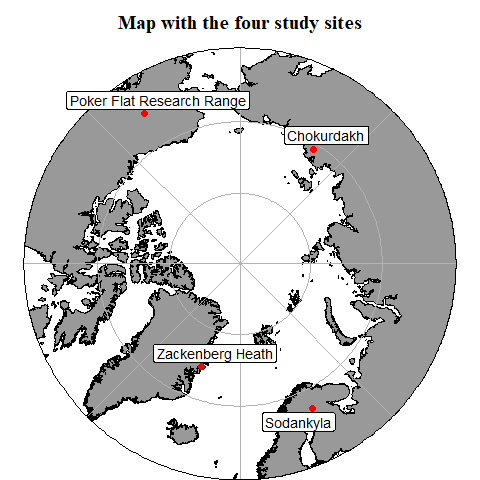

In [8]:
%%R

basemap(60) + 
    geom_spatial_point(data = FLUXNET.GPP@spatial.extent, aes(x = Lon, y = Lat), color = "red", size = 3, crs = 4326) +
    geom_spatial_label_repel(data = FLUXNET.GPP@spatial.extent, aes(x = Lon, y = Lat, label = Name), crs = 4326, size = 5) +
    theme(plot.title = element_text(family = "serif", face = "bold", size = 20, hjust = 0.5, margin=margin(15,0,15,0))) +
    labs(title = 'Map with the four study sites')

***
### Five-day mean <a class="anchor" id="five-day_mean"></a>

For the analysis, the daily model output and FLUXNET observations are aggregated to a five-daily mean value. The code in the cell below defines the function that is used for this and runs it for each of the *Fields*. It also updates the *spatial.extent* of the FLUXNET *Fields* with the longitude and latitude that correspond to the modelled output. I.e. it is rounded to the nearest .25 or .75 value.

In [9]:
%%R 

five_day_mean <- function(indata) {
    
  source.type <- strsplit(deparse(substitute(indata)), "[.]")[[1]][1]
  flux.type <- strsplit(deparse(substitute(indata)), "[.]")[[1]][2]
  
  if (flux.type == "GPP" & source.type == "LPJGUESS") {
    indata.select <- indata@data %>% select("Year", "Day", "Lon", "Lat", "Total")
  } else {
    indata.select <- indata@data %>% select("Year", "Day", "Lon", "Lat", flux.type)
  }
  
  # prepare empty data table to append the five daily averages to
  five.days <- indata.select[0,]
  
  # prepare start and end year indices
  index.DT <- data.table(matrix(data = NA, nrow = 0, ncol = 3, dimnames = list(c(), c("start_year", "end_year", "day"))))
  
  year.DT <- data.table(start_year = seq(1,365,5), last_year = seq(6,366,5))
  
  # search for data without missing values (e.g. when time series does not start on 1/1)
  for (i in 1:nrow(indata.select)) {
    if (indata.select$Day[i] == 361 & indata.select$Day[i+4] == 365) {
      index.DT <- rbind(index.DT, data.table(start_year = i, end_year = i+4, day = indata.select$Day[i]))
    } else if (indata.select$Day[i] %in% year.DT$start_year & indata.select$Day[i+5] %in% year.DT$last_year
               & indata.select$Day[i+5]-indata.select$Day[i] == 5) {
      index.DT <- rbind(index.DT, data.table(start_year = i, end_year = i+4, day = indata.select$Day[i]))
    } 
  }
  
  if (flux.type == "GPP" & source.type == "LPJGUESS") {
    # get five daily averages
    for (i in 1:nrow(index.DT)) {
      temp <- data.table(Year = indata.select$Year[index.DT$start_year[i]],
                         Day = index.DT$day[i],
                         Lon = indata.select$Lon[index.DT$start_year[i]],
                         Lat = indata.select$Lat[index.DT$start_year[i]],
                         Total = mean(indata.select$Total[index.DT$start_year[i]:index.DT$end_year[i]]))
      five.days <- rbind(five.days, temp)
    }
  } else if (flux.type == "GPP" & source.type == "FLUXNET") {
    # get five daily averages
    for (i in 1:nrow(index.DT)) {
      temp <- data.table(Year = indata.select$Year[index.DT$start_year[i]],
                         Day = index.DT$day[i],
                         Lon = indata.select$Lon[index.DT$start_year[i]],
                         Lat = indata.select$Lat[index.DT$start_year[i]],
                         GPP = mean(indata.select$GPP[index.DT$start_year[i]:index.DT$end_year[i]]))
      five.days <- rbind(five.days, temp)
      indata@quant@name <- "Daily GPP"
      indata@quant@id <- "dgpp"
    }
  } else if (flux.type == "NEE") {
    # get five daily averages
    for (i in 1:nrow(index.DT)) {
      temp <- data.table(Year = indata.select$Year[index.DT$start_year[i]],
                         Day = index.DT$day[i],
                         Lon = indata.select$Lon[index.DT$start_year[i]],
                         Lat = indata.select$Lat[index.DT$start_year[i]],
                         NEE = mean(indata.select$NEE[index.DT$start_year[i]:index.DT$end_year[i]]))
      five.days <- rbind(five.days, temp)
      indata@quant@name <- "Daily NEE"
      indata@quant@id <- "dnee"
    }
  } else if (flux.type == "Reco") {
    # get five daily averages
    for (i in 1:nrow(index.DT)) {
      temp <- data.table(Year = indata.select$Year[index.DT$start_year[i]],
                         Day = index.DT$day[i],
                         Lon = indata.select$Lon[index.DT$start_year[i]],
                         Lat = indata.select$Lat[index.DT$start_year[i]],
                         Reco = mean(indata.select$Reco[index.DT$start_year[i]:index.DT$end_year[i]]))
      five.days <- rbind(five.days, temp)
      indata@quant@name <- "Daily Reco"
      indata@quant@id <- "dreco"
    }
  }
  
  colnames(five.days)[5] <- flux.type
  
  if (source.type == "FLUXNET") {
    lon <- round((five.days$Lon + 0.25) * 2) / 2 - 0.25
    lat <- round((five.days$Lat + 0.25) * 2) / 2 - 0.25
    setnames(five.days, c("Lon", "Lat"), c("Lon_FLUXNET", "Lat_FLUXNET"))
    five.days <- cbind(five.days, lon)
    five.days <- cbind(five.days, lat)
    setnames(five.days, c("lon", "lat"), c("Lon", "Lat"))
    
    five.days <- cbind(five.days, data.table(Code = rep(NA, nrow(five.days)), Name = rep(NA, nrow(five.days))))
    for (i in 1:nrow(indata@spatial.extent)) {
      temp <- which(five.days$Lon_FLUXNET == indata@spatial.extent$Lon[i]
                    & five.days$Lat_FLUXNET == indata@spatial.extent$Lat[i])
      five.days$Code[temp] <- indata@spatial.extent$Code[i]
      five.days$Name[temp] <- indata@spatial.extent$Name[i]
    }
  }
  
  indata@data <- five.days
  indata@source@name <- source.type
  
  return(indata)
  
}

# get mean five daily data
FLUXNET.NEE.fivedays <- five_day_mean(indata = FLUXNET.NEE)
FLUXNET.GPP.fivedays <- five_day_mean(indata = FLUXNET.GPP)
FLUXNET.Reco.fivedays <- five_day_mean(indata = FLUXNET.Reco)
LPJGUESS.NEE.fivedays <- five_day_mean(indata = LPJGUESS.NEE)
LPJGUESS.GPP.fivedays <- five_day_mean(indata = LPJGUESS.GPP)
LPJGUESS.Reco.fivedays <- five_day_mean(indata = LPJGUESS.Reco)

***
## Time series <a class="anchor" id="time_series"></a>

Using the *plotTemporal* function from the **DGVMTools** time series for the fluxes can be plotted, see below after running the next two cells with code.

In [33]:
%%R

grid.names <- unique(FLUXNET.GPP.fivedays@data$Name)
names(grid.names) <- paste0("(", unique(FLUXNET.GPP.fivedays@data$Lon), ",", unique(FLUXNET.GPP.fivedays@data$Lat), ")")

ggsave(filename = paste0("time_series_NEE.jpeg"), 
     plot = plotTemporal(fields = list(selectYears(FLUXNET.NEE.fivedays, 2010, 2013),
                                       selectYears(LPJGUESS.NEE.fivedays, 2010, 2013)),
                         layers = "NEE", col.by = "Source", subtitle = NULL,
                         ncol = 1, labeller = as_labeller(grid.names)),
     device = "jpeg",
     width = 183,
     height = 300,
     units = c("mm"),
     dpi = 300)

ggsave(filename = paste0("time_series_GPP.jpeg"), 
     plot = plotTemporal(fields = list(selectYears(FLUXNET.GPP.fivedays, 2010, 2013),
                                       selectYears(LPJGUESS.GPP.fivedays, 2010, 2013)),
                         layers = "GPP", col.by = "Source", subtitle = NULL,
                         ncol = 1, labeller = as_labeller(grid.names)),
     device = "jpeg",
     width = 183,
     height = 300,
     units = c("mm"),
     dpi = 300)

ggsave(filename = paste0("time_series_Reco.jpeg"), 
     plot = plotTemporal(fields = list(selectYears(FLUXNET.Reco.fivedays, 2010, 2013),
                                       selectYears(LPJGUESS.Reco.fivedays, 2010, 2013)),
                         layers = "Reco", col.by = "Source", subtitle = NULL,
                         ncol = 1, labeller = as_labeller(grid.names)),
     device = "jpeg",
     width = 183,
     height = 300,
     units = c("mm"),
     dpi = 300)

In [34]:
file_NEE = open('time_series_NEE.jpeg', "rb")
file_GPP = open('time_series_GPP.jpeg', "rb")
file_Reco = open('time_series_Reco.jpeg', "rb")
image_NEE = file_NEE.read()
image_GPP = file_GPP.read()
image_Reco = file_Reco.read()
images = [image_NEE, image_GPP, image_Reco]
tab_names = ["NEE", "GPP", "Reco"]
children = [widgets.Image(
    value=i,
    format='jpeg',
    width=900,
    height=400,
) for i in images]
children
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, tab_names[i])
tab


The plots above seem to indicate that the model performs quite poorly for NEE. However, it should be noted that the amount of observational data is quite limited. 

The observations for GPP at the Poker Flat Research Range site show high peaks during some winters which the model does not capture. Interesting is that model output's immediate drops to zero during spring/autumn; the observations show a more gradual increase/decline. 

Reco is generally overestimated during high summer, with Sodankyla being the exception.

The modelled output for Zackenberg is zero for all three fluxes, indicating that there is no vegetation present at this site for the model run.

***
## Scatter plots with identity line <a class="anchor" id="scatter_plots"></a>

The code below can be used to create scatter plots to further explore how well LPJ-GUESS is able to simulate NEE, GPP and Reco. It is possible to select which seasons should be included, where the seasons are defined as:

* Winter $\rightarrow$ December, January, February
* Spring $\rightarrow$ March, April, May
* Summer $\rightarrow$ June, July, August
* Autumn $\rightarrow$ September, October, November
    
Note that you should rerun the code in the cells below the tick boxes after making a new selection.

In [12]:
%%R

# define function for seasonal flux scatter plots
scatter_fluxes_season_plot <- function(indata.FLUXNET, indata.LPJGUESS, seasons) {
  
  flux.type <- strsplit(deparse(substitute(indata.FLUXNET)), "[.]")[[1]][2]
  
  scatter.data <- merge(x = indata.FLUXNET,
                       y = indata.LPJGUESS,
                       by = c("Year", "Day", "Lon", "Lat"))
  
  # add season
  season <- data.frame(matrix(data = NA, nrow = nrow(scatter.data), ncol = 1))
  scatter.data <- cbind(scatter.data, season)
  names(scatter.data)[ncol(scatter.data)] <- "Season"
  
  for (s in 1:length(scatter.data$Day)) {
    if (scatter.data$Day[s] > 151 & scatter.data$Day[s] < 244) {
      scatter.data$Season[s] <- "Summer"
    } else if (scatter.data$Day[s] > 243 & scatter.data$Day[s] < 335) {
      scatter.data$Season[s] <- "Autumn"
    } else if (scatter.data$Day[s] > 59 & scatter.data$Day[s] < 152) {
      scatter.data$Season[s] <- "Spring"
    } else {
      scatter.data$Season[s] <- "Winter"
    }
  }
  
  scatter.data <- scatter.data[scatter.data$Season %in% seasons]  

  p.plots <- list()
  
  for (i in unique(scatter.data$Code)) {
    scatter.slice <- scatter.data[scatter.data$Code == i,]
    
    if (flux.type == "GPP") {
      setnames(scatter.slice, "GPP.x", "FLUXNET_GPP")
      setnames(scatter.slice, "GPP.y", "LPJGUESS_GPP")
      axis.lim.LPJGUESS <- max(scatter.slice$LPJGUESS_GPP, na.rm = T)
      axis.lim.FLUXNET <- max(scatter.slice$FLUXNET_GPP, na.rm = T)
      axis.lim <- max(axis.lim.LPJGUESS, axis.lim.FLUXNET, na.rm = T)
      
      p <- ggplot(scatter.slice) +
        geom_point(aes(x=FLUXNET_GPP, y=LPJGUESS_GPP, color=Season)) +
        geom_abline(intercept = 0, slope = 1) +
        xlim(c(0,axis.lim)) +
        ylim((c(0,axis.lim))) +
        xlab(paste0("FLUXNET GPP [kgC/m2]")) +
        ylab(paste0("LPJ-GUESS GPP [kgC/m2]")) +
        labs(title = scatter.slice$Code) +
        coord_fixed() +
        theme_bw() +
        scale_color_discrete(breaks = c("Winter", "Spring", "Summer", "Autumn"),
                            labels = c("Winter", "Spring", "Summer", "Autumn"))
      
    } else if (flux.type == "NEE") {
      setnames(scatter.slice, "NEE.x", "FLUXNET_NEE")
      setnames(scatter.slice, "NEE.y", "LPJGUESS_NEE")
      axis.lim.LPJGUESS <- max(scatter.slice$LPJGUESS_NEE, na.rm = T)
      axis.lim.FLUXNET <- max(scatter.slice$FLUXNET_NEE, na.rm = T)
      axis.lim <- max(axis.lim.LPJGUESS, axis.lim.FLUXNET, na.rm = T)
      
      axis.lim.LPJGUESS <- min(scatter.slice$LPJGUESS_NEE, na.rm = T)
      axis.lim.FLUXNET <- min(scatter.slice$FLUXNET_NEE, na.rm = T)
      axis.lim.min <- min(axis.lim.LPJGUESS, axis.lim.FLUXNET, na.rm = T)
      
      p <- ggplot(scatter.slice) +
        geom_point(aes(x=FLUXNET_NEE, y=LPJGUESS_NEE, color=Season)) +
        geom_abline(intercept = 0, slope = 1) +
        xlim(c(axis.lim.min,axis.lim)) +
        ylim((c(axis.lim.min,axis.lim))) +
        xlab(paste0("FLUXNET NEE [kgC/m2]")) +
        ylab(paste0("LPJ-GUESS NEE [kgC/m2]")) +
        labs(title = scatter.slice$Code) +
        coord_fixed() +
        theme_bw() +
        scale_color_discrete(breaks = c("Winter", "Spring", "Summer", "Autumn"),
                             labels = c("Winter", "Spring", "Summer", "Autumn"))
      
    } else if (flux.type == "Reco") {
      setnames(scatter.slice, "Reco.x", "FLUXNET_Reco")
      setnames(scatter.slice, "Reco.y", "LPJGUESS_Reco")
      axis.lim.LPJGUESS <- max(scatter.slice$LPJGUESS_Reco, na.rm = T)
      axis.lim.FLUXNET <- max(scatter.slice$FLUXNET_Reco, na.rm = T)
      axis.lim <- max(axis.lim.LPJGUESS, axis.lim.FLUXNET, na.rm = T)

      p <- ggplot(scatter.slice) +
        geom_point(aes(x=FLUXNET_Reco, y=LPJGUESS_Reco, color=Season)) +
        geom_abline(intercept = 0, slope = 1) +
        xlim(c(0, axis.lim)) +
        ylim(c(0, axis.lim)) +
        xlab(paste0("FLUXNET Reco [kgC/m2]")) +
        ylab(paste0("LPJ-GUESS Reco [kgC/m2]")) +
        labs(title = scatter.slice$Code) +
        coord_fixed() +
        theme_bw() +
        scale_color_discrete(breaks = c("Winter", "Spring", "Summer", "Autumn"),
                             labels = c("Winter", "Spring", "Summer", "Autumn"))
      
    }

    p <- list(p)
    p.plots <- append(p.plots, p)
    
  }

  ggsave(filename = paste0("scatter_plot_", flux.type, ".jpeg"), 
         plot = ggarrange(p.plots[[1]], p.plots[[2]], p.plots[[3]], p.plots[[4]], ncol = 2, nrow = 2,
                                           common.legend = T, legend = "bottom"),
         device = "jpeg",
         width = 183,
         height = 200,
         units = c("mm"),
         dpi = 300)
}


In [13]:
def f(x):
    return x

w_winter=interactive(f, x=widgets.Checkbox(
    value=True,
    description='Winter'));
w_spring=interactive(f, x=widgets.Checkbox(
    value=True,
    description='Spring'));
w_summer=interactive(f, x=widgets.Checkbox(
    value=True,
    description='Summer'));
w_autumn=interactive(f, x=widgets.Checkbox(
    value=True,
    description='Autumn'));

In [14]:
print("Seasons to include in scatter plots")
display(w_winter)
display(w_spring)
display(w_summer)
display(w_autumn)

Seasons to include in scatter plots


interactive(children=(Checkbox(value=True, description='Winter'), Output()), _dom_classes=('widget-interact',)…

interactive(children=(Checkbox(value=True, description='Spring'), Output()), _dom_classes=('widget-interact',)…

interactive(children=(Checkbox(value=True, description='Summer'), Output()), _dom_classes=('widget-interact',)…

interactive(children=(Checkbox(value=True, description='Autumn'), Output()), _dom_classes=('widget-interact',)…

In [15]:
w_r_winter=w_winter.result
w_r_spring=w_spring.result
w_r_summer=w_summer.result
w_r_autumn=w_autumn.result

%R -i w_r_winter
%R -i w_r_spring
%R -i w_r_summer
%R -i w_r_autumn
%Rpull w_r_winter
%Rpull w_r_spring
%Rpull w_r_summer
%Rpull w_r_autumn

In [16]:
%%R

seasons <- c(w_r_winter, w_r_spring, w_r_summer, w_r_autumn)
season_names <- c("Winter", "Spring", "Summer", "Autumn")
for (s in 1:length(seasons)) {
    if (seasons[s] == T) {
        seasons[s] <- season_names[s] 
    }
}
seasons <- seasons[!seasons==F]

scatter_fluxes_season_plot(indata.FLUXNET = FLUXNET.NEE.fivedays@data,
                           indata.LPJGUESS = LPJGUESS.NEE.fivedays@data,
                            seasons = seasons)
scatter_fluxes_season_plot(indata.FLUXNET = FLUXNET.GPP.fivedays@data,
                           indata.LPJGUESS = LPJGUESS.GPP.fivedays@data,
                            seasons = seasons)
scatter_fluxes_season_plot(indata.FLUXNET = FLUXNET.Reco.fivedays@data,
                           indata.LPJGUESS = LPJGUESS.Reco.fivedays@data,
                            seasons = seasons)

In [17]:
file_NEE = open('scatter_plot_NEE.jpeg', "rb")
file_GPP = open('scatter_plot_GPP.jpeg', "rb")
file_Reco = open('scatter_plot_Reco.jpeg', "rb")
image_NEE = file_NEE.read()
image_GPP = file_GPP.read()
image_Reco = file_Reco.read()
images = [image_NEE, image_GPP, image_Reco]
tab_names = ["NEE", "GPP", "Reco"]
children = [widgets.Image(
    value=i,
    format='jpeg',
    width=900,
    height=400,
) for i in images]
children
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, tab_names[i])
tab


The scatter plots above clearly show that the simulated values of the three fluxes at Zackenberg are always (almost) zero. The lack of observations for NEE is also visible for the Chokurdakh site. 

LPJ-GUESS tends to underestimate the GPP for Sodankyla in the summer. There is a large spread for the American and Russian sites. For the GPP at Poker Flat Research Range during summer, there are some data points which much higher values for LPJ-GUESS than the observations. These points correspond to the year 2010, see the time series. It is also evident that the modelled GPP almost never exceeds zero during the winter.

It can be seen that the model generally underestimates Reco for the Russian site during spring and autumn. For the American site, on the other hand, the FLUXNET values tend to be lower than the modelled output.


***
## Snow depth <a class="anchor" id="snow_depth"></a>

The fact that there is no vegetation at Chokurdakh according to the model might be explained by the presence of snow. The code below plots the modelled mean monthly snow depth for the years 2010-2015. Note that the years can be changed in the last few lines of the code when calling the *snowdepth_plot* function. The caculated mean monthly snowdepth is saved in the *mean_snowdepth.csv* file.

In [35]:
%%R

snowdepth_plot <- function(first.year, last.year, indata.FLUXNET) {
  # get range of years
  first.year <- as.numeric(first.year)
  last.year <- as.numeric(last.year)
  
  if (first.year > last.year) {
    warning("First year exceeds last year!")
    stop()
  }
    
  
  # read LPJ-GUESS data
  snowdepth.input <- read.delim(file = "msnowdepth.out", sep="")
      
  p.plots <- list()
    
  lonlat <- unique(indata.FLUXNET@data[,6:9])  

  level.order <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                   "Sep", "Oct", "Nov", "Dec")

  for (i in 1:nrow(lonlat)) {
      mean.snowdepth <- data.frame(matrix(data = NA, nrow = 0, ncol = 12))
  
      # get snow depth for site
      snowdepth <- snowdepth.input[snowdepth.input$Lat == lonlat$Lat[i] &
                       snowdepth.input$Lon == lonlat$Lon[i] &
                       snowdepth.input$Year >= first.year &
                       snowdepth.input$Year <= last.year,]
      
      to.append <- colMeans(x = snowdepth)
      mean.snowdepth <- rbind(mean.snowdepth, to.append[4:15])
      
      mean.snowdepth.T <- transpose(mean.snowdepth)
      mean.snowdepth.T <- cbind(mean.snowdepth.T, colnames(snowdepth.input)[4:15])
      colnames(mean.snowdepth.T) <- c("Snowdepth", "Month")
      
      p <- ggplot(mean.snowdepth.T, aes(x = Month, y = Snowdepth, group = 1)) +
        geom_line() +
        geom_point() +
        theme_minimal() +
        ylim(c(0,0.85)) +
        ylab("Snowdepth [m]") +
        scale_x_discrete(limits = level.order) +
         ggtitle(lonlat$Name[i])
      p <- list(p)
      p.plots <- append(p.plots, p)
      
      if (i == 1) {
          data.to.save <- mean.snowdepth.T
          mean.snowdepth.T <- cbind(mean.snowdepth.T, data.table(Code = rep(lonlat$Code[i], nrow(mean.snowdepth.T)),
                                                                 Name = rep(lonlat$Name[i], nrow(mean.snowdepth.T))))
          data.to.save <- mean.snowdepth.T
      } else {
          mean.snowdepth.T <- cbind(mean.snowdepth.T, data.table(Code = rep(lonlat$Code[i], nrow(mean.snowdepth.T)),
                                                     Name = rep(lonlat$Name[i], nrow(mean.snowdepth.T))))
          data.to.save <- rbind(data.to.save, mean.snowdepth.T)
      }

  }
  
  write.csv(data.to.save, "mean_snowdepth.csv", row.names=FALSE)
    
  ggarranged.plots <- ggarrange(p.plots[[1]], p.plots[[2]], p.plots[[3]], p.plots[[4]], ncol = 2, nrow = 2)
    
  ggsave(filename = "snowdepth.jpeg", 
         plot = ggarranged.plots,
         device = "jpeg",
         width = 183,
         height = 130,
         units = c("mm"),
         dpi = 300)
    
  
}

snowdepth_plot(first.year = 2010,
      last.year = 2015,
      indata.FLUXNET = FLUXNET.GPP.fivedays)

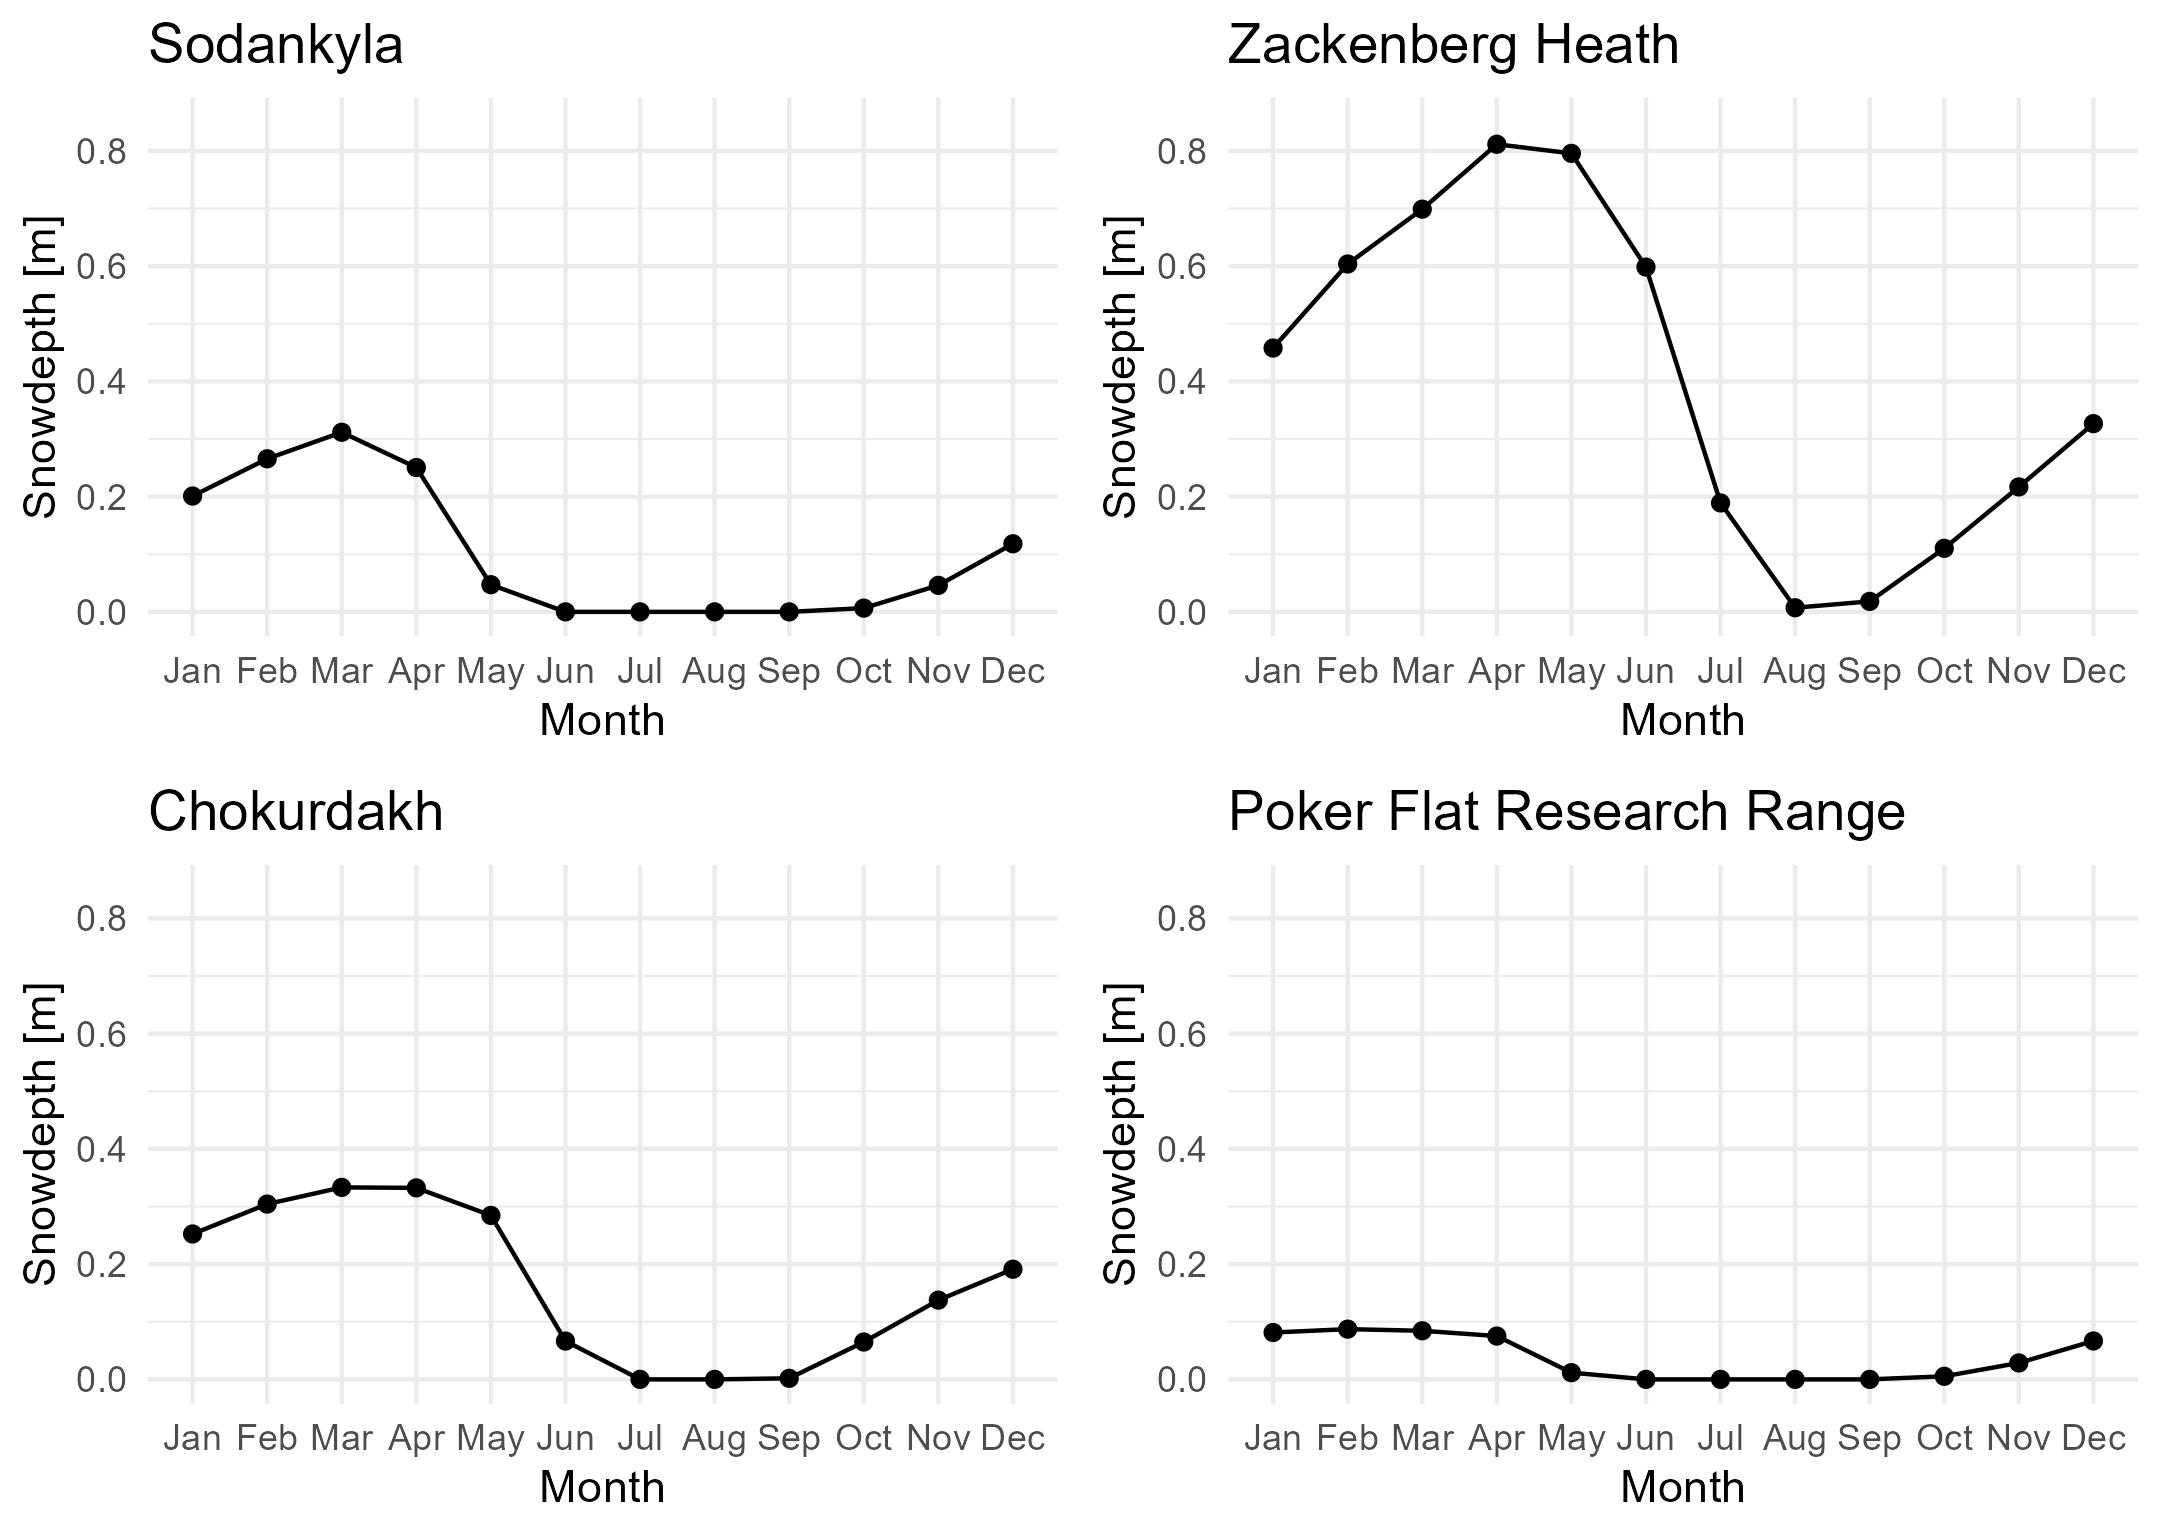

In [36]:
Image(filename='snowdepth.jpeg') 

The mean monthly snow depth over the years 2010-2015 show that model simulates a rather thick snowpack for Zackenberg. The presence of snow throughout the year at this site is likely to explain why no vegetation can establish and survive. Consequently, the simulated vegetation fluxes will be (close to) zero.